In [20]:
import distillation.amundson_1958 as am
model = am.Model(
    components=['n-Butane', 'n-Pentane', 'n-Octane'],
    F=1000., # kmol/h
    P=2*1e5, # Pa
    z_feed = [0.20, 0.5, 0.3],
    RR=1.,
    D=400.,
    N=30,
    feed_stage=15,
)

In [21]:
model.add_parameters(verbose=True)



Setting DePriester parameters for n-Butane:
             a_T1 [deg Rankine^2]: -1280557.0
             a_T2 [deg Rankine]: 0.0
             a_T6 [dimensionless]: 7.94986
             a_p1 [dimensionless]: -0.96455
             a_p2 [psia^2]: 0.0
             a_p3 [psia]: 0.0
     K value at 300 K, 1 bar=  2.661186999988651
Setting DePriester parameters for n-Pentane:
             a_T1 [deg Rankine^2]: -1524891.0
             a_T2 [deg Rankine]: 0.0
             a_T6 [dimensionless]: 7.33129
             a_p1 [dimensionless]: -0.89143
             a_p2 [psia^2]: 0.0
             a_p3 [psia]: 0.0
     K value at 300 K, 1 bar=  0.7541583496653457
Setting DePriester parameters for n-Octane:
             a_T1 [deg Rankine^2]: 0.0
             a_T2 [deg Rankine]: -7646.81641
             a_T6 [dimensionless]: 12.48457
             a_p1 [dimensionless]: -0.73152
             a_p2 [psia^2]: 0.0
             a_p3 [psia]: 0.0
     K value at 300 K, 1 bar=  0.026447701262845617
Setting heat capac

In [22]:
print(model.T_feed)
model.T_feed = model.bubble_T_feed()
print(model.T_feed)

300.0
325.9228553172105


In [23]:
for i in model.stages:
    model.T[i] = model.T_feed
print(model.T)

[325.92285532 325.92285532 325.92285532 325.92285532 325.92285532
 325.92285532 325.92285532 325.92285532 325.92285532 325.92285532
 325.92285532 325.92285532 325.92285532 325.92285532 325.92285532
 325.92285532 325.92285532 325.92285532 325.92285532 325.92285532
 325.92285532 325.92285532 325.92285532 325.92285532 325.92285532
 325.92285532 325.92285532 325.92285532 325.92285532 325.92285532
 325.92285532]


In [24]:
print(model.L)
print(model.V)
model.initialize_flow_rates()
print(model.L)
print(model.V)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
[ 400.  400.  400.  400.  400.  400.  400.  400.  400.  400.  400.  400.
  400.  400.  400. 1400. 1400. 1400. 1400. 1400. 1400. 1400. 1400. 1400.
 1400. 1400. 1400. 1400. 1400. 1400.  600.]
[  0. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800. 800.]


In [25]:
model.update_K_values()

In [26]:
for i in model.components:
    print(i, model.l[i])
for i in model.components:
    model.solve_component_mass_bal(i)
for i in model.components:
    print(i, model.l[i])

n-Butane [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
n-Pentane [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
n-Octane [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
n-Butane [1.99931468e+02 7.49625989e+01 5.15345930e+01 4.71425275e+01
 4.63191437e+01 4.61647834e+01 4.61358453e+01 4.61304203e+01
 4.61294033e+01 4.61292126e+01 4.61291769e+01 4.61291701e+01
 4.61291689e+01 4.61291687e+01 4.61291686e+01 1.61452090e+02
 1.05891430e+02 6.94354382e+01 4.55149274e+01 2.98195422e+01
 1.95210533e+01 1.27637247e+01 8.32991997e+00 5.42068974e+00
 3.51180538e+00 2.25929554e+00 1.43746424e+00 8.98221629e-01
 5.44398896e-01 3.12238968e-01 6.85319117e-02]
n-Pentane [161.47974429 178.68925577 188.2110531  193.47933887 196.3942124
 198.00697375 198.89929349 199.39300231 199.66616494 199.81730225
 199.90092454 199.94719166 199.97279065 199.98695423 199.994

In [27]:
print(model.T)
for stage in model.stages:
    model.T[stage] = model.bubble_T(stage)
print(model.T)

[325.92285532 325.92285532 325.92285532 325.92285532 325.92285532
 325.92285532 325.92285532 325.92285532 325.92285532 325.92285532
 325.92285532 325.92285532 325.92285532 325.92285532 325.92285532
 325.92285532 325.92285532 325.92285532 325.92285532 325.92285532
 325.92285532 325.92285532 325.92285532 325.92285532 325.92285532
 325.92285532 325.92285532 325.92285532 325.92285532 325.92285532
 325.92285532]
[302.20068703 312.49278706 316.47614104 317.48431612 317.75806674
 317.85401622 317.89656025 317.9180896  317.92961467 317.93592481
 317.93949948 317.94247871 317.95434893 318.06481245 319.16909974
 329.15509051 333.07888509 336.1183067  338.35994917 339.9539896
 341.05811118 341.80846988 342.31065996 342.6409709  342.85110071
 342.97260855 343.01923008 342.98609765 342.85406897 342.92122026
 353.71870797]


In [28]:
print(model.T_is_converged())

False


In [29]:
iter = 0
while not model.T_is_converged():
    model.update_K_values()
    for i in model.components:
        model.solve_component_mass_bal(i)
    for stage in model.stages:
        model.T[stage] = model.bubble_T(stage)
    print(iter, model.T)
    iter += 1

0 [303.38478907 314.40089614 318.99873586 320.53908257 321.08350365
 321.31448141 321.43243925 321.5006431  321.54282599 321.56984576
 321.587511   321.59940686 321.61043761 321.66287965 322.33093483
 329.5960606  333.08171836 335.10754464 336.12670544 336.59624856
 336.81149374 336.92996193 337.02863754 337.14502654 337.29998479
 337.50932507 337.78981332 338.16475787 338.71226435 340.41853077
 355.09765023]
1 [303.78539738 314.73359669 319.10594226 320.39852696 320.72106775
 320.77288732 320.75469426 320.72282079 320.69281602 320.66836593
 320.64963862 320.63619005 320.63208906 320.69790963 321.55666262
 329.84980352 333.87276497 336.50125159 338.03703806 338.86544641
 339.27598235 339.44827336 339.48492256 339.44325511 339.35687959
 339.24914209 339.1420103  339.06623401 339.13113586 340.55379618
 355.62358558]
2 [304.06875008 315.01004806 319.31897932 320.59369382 320.93805212
 321.03172668 321.06183957 321.07688557 321.08852166 321.09901262
 321.10850096 321.11713877 321.12915771 

In [30]:
print(model.L)
print(model.V)
model.solve_energy_balances()
print(model.L)
print(model.V)

[ 400.  400.  400.  400.  400.  400.  400.  400.  400.  400.  400.  400.
  400.  400.  400. 1400. 1400. 1400. 1400. 1400. 1400. 1400. 1400. 1400.
 1400. 1400. 1400. 1400. 1400. 1400.  600.]
[  0. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800. 800.]
[ 400.          296.15486763  296.4206404   296.77798903  296.91745481
  296.98240932  297.0278988   297.06918374  297.11043946  297.15294299
  297.19636286  297.23162897  297.15027414  295.67151572  280.28006379
 1315.20277001 1333.46530151 1346.39991806 1354.16749952 1358.424039
 1360.65470363 1361.80594072 1362.40245158 1362.71646904 1362.8846854
 1362.97426735 1363.00781726 1362.81503165 1359.53584958 1320.15496888
  600.        ]
[  0.         703.11748503 696.15486763 696.4206404  696.77798903
 696.91745481 696.98240932 697.0278988  697.06918374 697.11043946
 697.15294299 697.19636286 697.23162897 697.15027414 695.67151572
 680.28006379 

In [31]:
print(model.flow_rates_converged())

False


In [32]:
outer_loop = 0
inner_loop = 0
while not model.flow_rates_converged():
    outer_loop += 1
    for i in model.components:
        model.solve_component_mass_bal(i)
    for stage in model.stages:
        model.T[stage] = model.bubble_T(stage)
    while not model.T_is_converged():
        inner_loop += 1
        model.update_K_values()
        for i in model.components:
            model.solve_component_mass_bal(i)
        for stage in model.stages:
            model.T[stage] = model.bubble_T(stage)
    model.solve_energy_balances()
    print(outer_loop, inner_loop, model.V)

1 5 [  0.         721.38834597 777.85105549 805.30237075 817.38654678
 822.46512566 824.59740573 825.49559356 825.87414925 826.03273901
 826.09752978 826.12050394 826.1080965  825.88906581 823.51372777
 802.33963229 804.80084779 826.21639332 842.99613818 853.85307651
 860.10125815 863.46734681 865.21676412 866.10759834 866.55505605
 866.77711894 866.88394405 866.90712819 866.56069072 862.03200725
 817.3039594 ]
2 10 [  0.         712.04261049 748.60701611 768.62692913 779.18389101
 784.56714356 787.32028642 788.73732592 789.4707598  789.85293116
 790.0546242  790.16350304 790.21620375 790.11979452 788.44419748
 770.71461361 794.56548234 815.99422672 831.3713764  840.6184528
 845.6379949  848.21980425 849.51545247 850.16143076 850.48531579
 850.64963035 850.73187561 850.74450011 850.36754206 845.51150639
 797.96716448]
3 14 [  0.         714.59505957 759.33702275 782.6379998  794.22095408
 799.81117549 802.52572748 803.854202   804.50884891 804.83470307
 805.00016285 805.08673086 805.12

In [33]:
x = {}
for i in model.components:
    x[i] = model.l[i][:]/model.L[:]
print(x)

{'n-Butane': array([4.99997739e-01, 2.73168224e-01, 1.72281968e-01, 1.44741057e-01,
       1.36793862e-01, 1.34302003e-01, 1.33437597e-01, 1.33104357e-01,
       1.32963465e-01, 1.32899729e-01, 1.32869593e-01, 1.32853869e-01,
       1.32830512e-01, 1.32623417e-01, 1.30194165e-01, 1.09996997e-01,
       6.09728046e-02, 3.17657833e-02, 1.59671340e-02, 7.87413948e-03,
       3.84547961e-03, 1.86884299e-03, 9.05935251e-04, 4.38499666e-04,
       2.11973375e-04, 1.02286123e-04, 4.91945909e-05, 2.34971753e-05,
       1.10333509e-05, 4.85320985e-06, 1.50709632e-06]), 'n-Pentane': array([0.50001358, 0.84763154, 0.88469737, 0.88304886, 0.87700938,
       0.87264714, 0.87011657, 0.86875955, 0.86805716, 0.86770029,
       0.86752048, 0.8674204 , 0.86723229, 0.86541323, 0.8439952 ,
       0.66787263, 0.71936901, 0.7503811 , 0.7672657 , 0.77594541,
       0.78027285, 0.78239575, 0.78342679, 0.78392221, 0.78415506,
       0.7842566 , 0.78427212, 0.78400507, 0.78074902, 0.74426444,
       0.49999095]

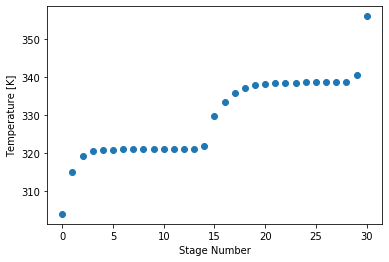

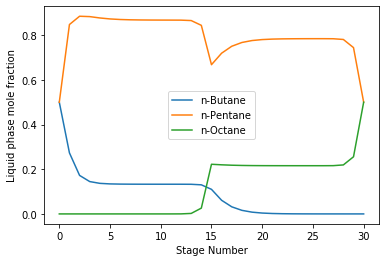

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(model.stages, model.T, 'o')
ax.set_xlabel('Stage Number')
ax.set_ylabel('Temperature [K]')

# plot liquid-phase mole fractions
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111)
# calculate mole fractions
for i in model.components:
    ax2.plot(model.stages, x[i], label=i)
ax2.set_ylabel('Liquid phase mole fraction')
ax2.set_xlabel('Stage Number')
ax2.legend()

